# Data Visualization for Homicide Reports across US from 1984


Reading the Data Frame from the csv file

In [212]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import json
import folium

# import the csv files into dataframes
Homicidedataframe = DataFrame(pd.read_csv('HomicideReport.csv'))
Homicidedataframe

Record ID Agency Code                Agency Name       Agency Type  \
0               1     AK00101                  Anchorage  Municipal Police   
1               2     AK00101                  Anchorage  Municipal Police   
2               3     AK00101                  Anchorage  Municipal Police   
3               4     AK00101                  Anchorage  Municipal Police   
4               5     AK00101                  Anchorage  Municipal Police   
5               6     AK00101                  Anchorage  Municipal Police   
6               7     AK00101                  Anchorage  Municipal Police   
7               8     AK00101                  Anchorage  Municipal Police   
8               9     AK00101                  Anchorage  Municipal Police   
9              10     AK00101                  Anchorage  Municipal Police   
10             11     AK00101                  Anchorage  Municipal Police   
11             12     AK00101                  Anchorage  Municipal Police   
12             13     AK00101                  Anchorage  Municipal Police   
13             14     AK00101                  Anchorage  Municipal Police   
14             15     AK00101                  Anchorage  Municipal Police   
15             16     AK00101                  Anchorage  Municipal Police   
16             17     AK00101                  Anchorage  Municipal Police   
17             18     AK00103                     Juneau  Municipal Police   
18             19     AK00106                       Nome  Municipal Police   
19             20     AK00113                     Bethel  Municipal Police   
20             21     AK00118        North Slope Borough     County Police   
21             22     AK00118        North Slope Borough     County Police   
22             23     AK00118        North Slope Borough     County Police   
23             24     AK00118        North Slope Borough     County Police   
24             25     AK00118        North Slope Borough     County Police   
25             26     AK00123                      Kenai  Municipal Police   
26             27     AKASP00        Alaska State Police      State Police   
27             28     AKASP00        Alaska State Police      State Police   
28             29     AKASP00        Alaska State Police      State Police   
29             30     AKASP00        Alaska State Police      State Police   
...           ...         ...                        ...               ...   
638424     638425     WVWSP21     State Police: Kingwood      State Police   
638425     638426     WVWSP24     State Police: Danville      State Police   
638426     638427     WVWSP29   State Police: Morgantown      State Police   
638427     638428     WVWSP29   State Police: Morgantown      State Police   
638428     638429     WVWSP33  State Police: Parkersburg      State Police   
638429     638430     WVWSP39    State Police: Princeton      State Police   
638430     638431     WVWSP49       State Police: Sutton      State Police   
638431     638432     WVWSP52        State Police: Wayne      State Police   
638432     638433     WVWSP52        State Police: Wayne      State Police   
638433     638434     WVWSP53   State Police: Upperglade      State Police   
638434     638435     WVWSP55        State Police: Welch      State Police   
638435     638436     WVWSP55        State Police: Welch      State Police   
638436     638437     WVWSP60   State Police: Williamson      State Police   
638437     638438     WVWSP65                Sp: Hundred      State Police   
638438     638439     WVWSP65                Sp: Hundred      State Police   
638439     638440     WVWSP65                Sp: Hundred      State Police   
638440     638441     WY00101                    Laramie  Municipal Police   
638441     638442     WY00300            Campbell County           Sheriff   
638442     638443     WY01100             Laramie County           Sheriff   
638443     638444     WY01101 

Select the Report based on State and Incident

In [213]:
AllStateReport = Homicidedataframe[['State','Incident']]

Dropping any Unknown Variables in the two columns

In [214]:
AllStateReport = AllStateReport.replace('Unknown', np.nan)
AllStateReport = AllStateReport.dropna()

Getting the sum of each state's Incident Report

In [217]:
StateGroupReport = AllStateReport.groupby('State',as_index=False).sum()
StateGroupReport

State  Incident
0                Alabama     38149
1                 Alaska      2704
2                Arizona     61337
3               Arkansas     12898
4             California   1011666
5               Colorado     15993
6            Connecticut      8727
7               Delaware      1592
8   District of Columbia    133621
9                Florida   8100400
10               Georgia     72159
11                Hawaii      2655
12                 Idaho      1209
13              Illinois    675189
14               Indiana     39324
15                  Iowa      2111
16                Kansas      5348
17              Kentucky     15654
18             Louisiana    116804
19                 Maine       907
20              Maryland    140968
21         Massachusetts     15506
22              Michigan    404028
23             Minnesota      8196
24           Mississippi     12248
25              Missouri     83967
26               Montana       640
27              Nebraska      2663
28                Nevada     26179
29         New Hampshire       763
30            New Jersey     35128
31            New Mexico      8956
32              New York   2580966
33        North Carolina     34480
34          North Dakota       314
35                  Ohio     68784
36              Oklahoma     36867
37                Oregon      7395
38          Pennsylvania    232233
39         Rhodes Island      2080
40        South Carolina     15400
41          South Dakota       556
42             Tennessee     73896
43                 Texas    473974
44                  Utah      2569
45               Vermont       503
46              Virginia     33447
47            Washington     12707
48         West Virginia      4437
49             Wisconsin     24946
50               Wyoming       720

Forming a barchart for each state

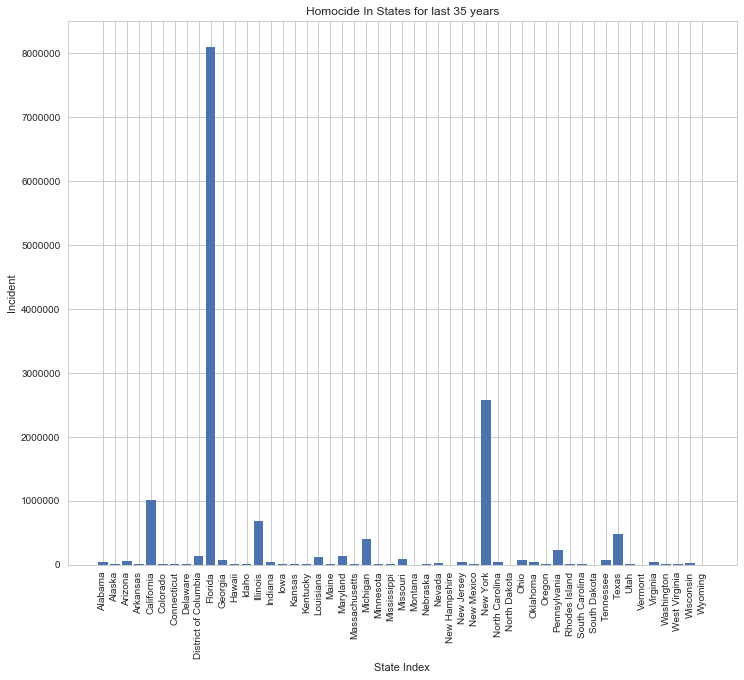

In [216]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,10))

plt.bar(range(51), StateGroupReport.Incident,
         align='center')

plt.xticks(range(51), StateGroupReport.State,rotation=90 )

ax.set_ylabel('Incident') #('Incident')

ax.set_xlabel('State Index')

plt.title('Homocide In States for last 35 years')

plt.show()

#StateGroupReport[['State']]

Getting the top 5 States with most Incidents

In [218]:
TopFiveStates = StateGroupReport.sort_values('Incident',ascending=False).head(5)
TopFiveStates

State  Incident
9      Florida   8100400
32    New York   2580966
4   California   1011666
13    Illinois    675189
43       Texas    473974

Drawing a pie chart for top 5 states

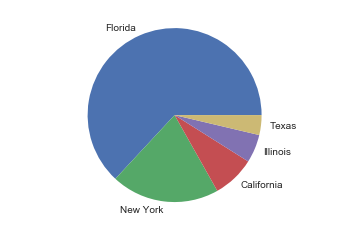

In [219]:
plt.axis('equal');
plt.rcParams['font.size'] = 9.0
plt.pie(TopFiveStates.Incident,labels=TopFiveStates.State);
plt.show()

Selecting the report for Relationships

In [220]:
RelationShipDF = Homicidedataframe[['Relationship','Incident']]
RelationShipDF.head()

Relationship  Incident
0  Acquaintance         1
1  Acquaintance         1
2       Unknown         2
3  Acquaintance         1
4       Unknown         2

Getting the sum of Incidents for Relationship

In [221]:
RelationShipDFGroup = RelationShipDF.groupby('Relationship',as_index=False).sum()
RelationShipDFGroup=RelationShipDFGroup.sort_values('Incident',ascending=False)

Printing a bar chart for the relationship and incident after removing unknown

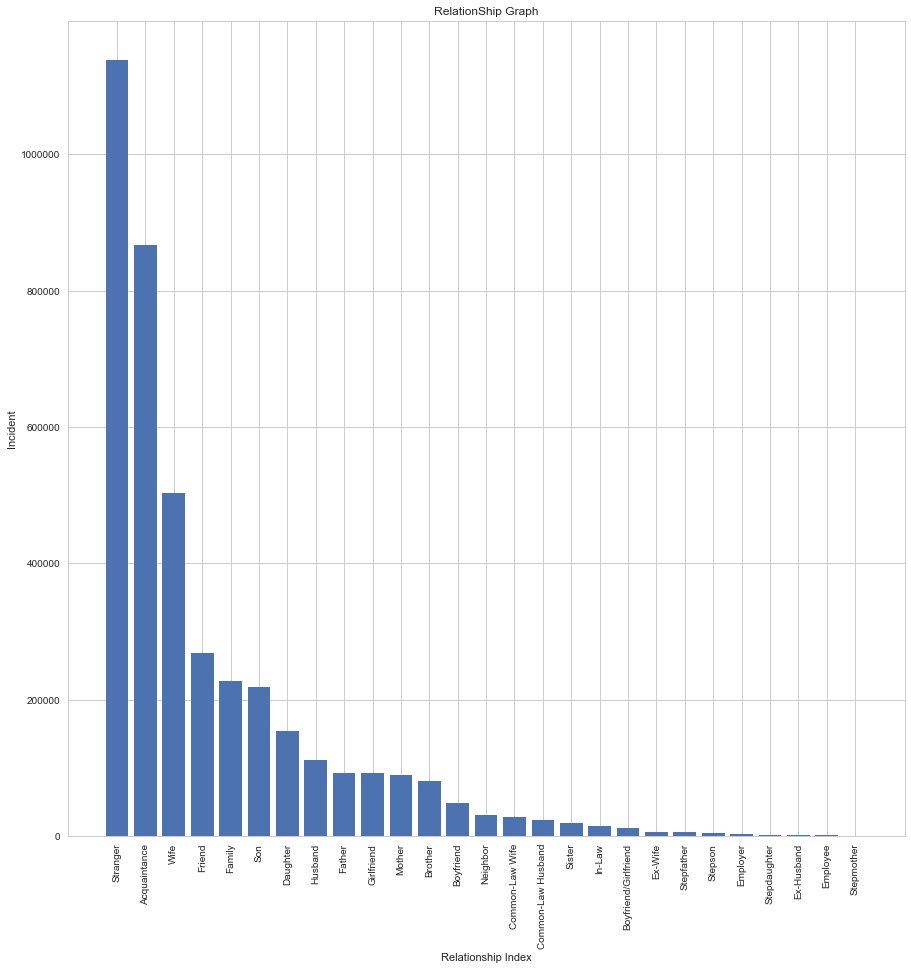

In [222]:
RelationShipDFGroup = RelationShipDFGroup[RelationShipDFGroup.Relationship != 'Unknown']

fig, ax = plt.subplots(figsize=(15,15))

plt.bar(range(27), RelationShipDFGroup.Incident,
         align='center')

plt.xticks(range(27), RelationShipDFGroup.Relationship ,rotation=90 )

ax.set_ylabel('Incident')

ax.set_xlabel('Relationship Index')

plt.title('RelationShip Graph')

plt.show()



Grouping the Report for Weapon

In [223]:
WeaponDF = Homicidedataframe[['Weapon','Incident']]
WeaponDF = WeaponDF.groupby('Weapon',as_index=False).sum()
WeaponDF.head()

Weapon  Incident
0  Blunt Object   1591719
1      Drowning      6012
2         Drugs     37076
3    Explosives      7150
4          Fall      1830

Removing the unknown weapon

In [224]:
WeaponDF = WeaponDF[WeaponDF.Weapon != 'Unknown']
WeaponDF.head()

Weapon  Incident
0  Blunt Object   1591719
1      Drowning      6012
2         Drugs     37076
3    Explosives      7150
4          Fall      1830

Pie Chart for top 5 Weapons

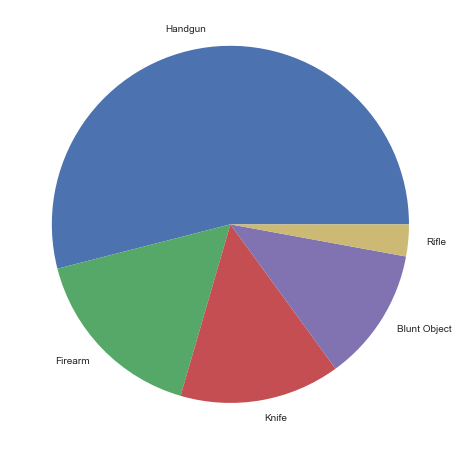

In [225]:
WeaponDF = WeaponDF.sort_values('Incident',ascending=False).head(5)
plt.axis('equal');
plt.rcParams['font.size'] = 15.0
fig = plt.gcf()
fig.set_size_inches(8,8) 
plt.pie(WeaponDF.Incident,labels=WeaponDF.Weapon);
plt.show()

Draw Line Graph for Relationship - Year - Incident Relationship

In [231]:
RelationshipYearDF = Homicidedataframe[['Year','Relationship','Incident']]
#RelationshipYearDF

Group By Year and Relationship

In [232]:
RelationshipYearDF = RelationshipYearDF.groupby(['Year', 'Relationship'],as_index=False).sum()
#RelationshipYearDF

Getting the top 5 Relationship apart from Unknown and Stranger

In [233]:
TopFiveRelationShipDFGroup = RelationShipDFGroup.sort_values('Incident',ascending=False)
TopFiveRelationShipDFGroup = TopFiveRelationShipDFGroup[~TopFiveRelationShipDFGroup.Relationship.isin(['Unknown','Stranger'])].head(5)


Pivot the table for top 5 Relationship

In [234]:
RelationshipYearDF = RelationshipYearDF[RelationshipYearDF.Relationship.isin(TopFiveRelationShipDFGroup.Relationship)]
RelationshipYearDF = RelationshipYearDF.pivot(index='Year', columns='Relationship', values='Incident')
RelationshipYearDF

Relationship  Acquaintance  Family  Friend    Son   Wife
Year                                                    
1980                 49066    1937   13810   2965   5886
1981                 48047    2962   13410   3086   4813
1982                 32750    2974   10393   3077   4170
1983                 40231    4452   11249   3140   5991
1984                 34910    3500    5715   1412   4596
1985                 32673    2331    7398   2000   4103
1986                 35155    4006   14902   3420   4217
1987                 47547    3527    9809   1436   3629
1988                 56413    3812   10402   1964   4472
1989                 54678    3140   14338   1952   3850
1990                 47796    3642   13263   2565   4216
1991                 40890    4119   16381   3253   4745
1992                 34207    4143   17491   2721   3490
1993                 34646    3571   15954   2169   4954
1994                 30406    3678    9090   2052   2755
1995                 25881    2435    7099   1762   2774
1996                 23667    1434    5297   1106   2742
1997                 23706    1337    4095   1965   1768
1998                 15418     991    3278   1101   2083
1999                 13429    1362    3355   1015   1773
2000                 11031    6047    1535   4019  18562
2001                 10886    5432    2286  10336  38056
2002                 10897   14563    2194  10984  30325
2003                 11463    3562    1951   8430  26812
2004                 12016    9667    1222  11042  28885
2005                 11387    7224    1302   7995  23539
2006                 16137   12573    1254  12885  26511
2007                  9341   12437    3740   6705  28841
2008                  8017    8325    5389  13318  24793
2009                  7168    9845    3564  15009  34674
2010                  6232   16721   28713  21742  38893
2011                  6192   13622    2874   8912  35815
2012                  6969   18221    1984  17608  33541
2013                  6464    7216    1585  15819  21546
2014                 11457   23519    2271   9367  15886

Draw Line Graph

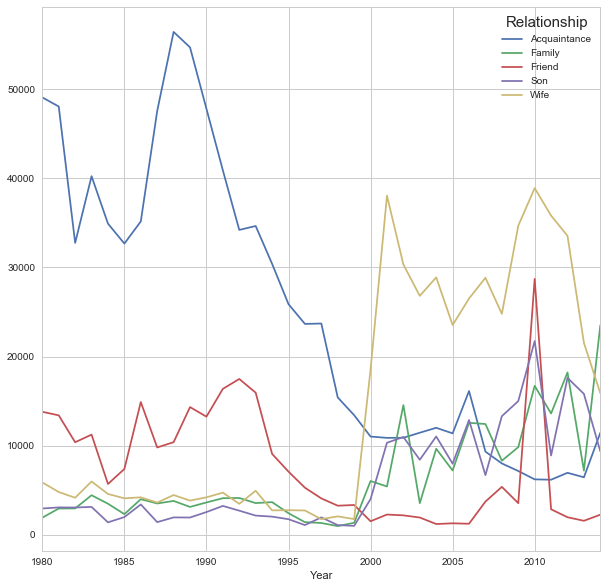

In [235]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
RelationshipYearDF.plot()
plt.show()

Getting Year wise Incident Count

In [236]:
YearWiseIncident = Homicidedataframe[['Year','Incident']]
YearWiseIncident = YearWiseIncident.groupby('Year',as_index=False).sum()
#YearWiseIncident

Histogram for Incident Count in Each Year

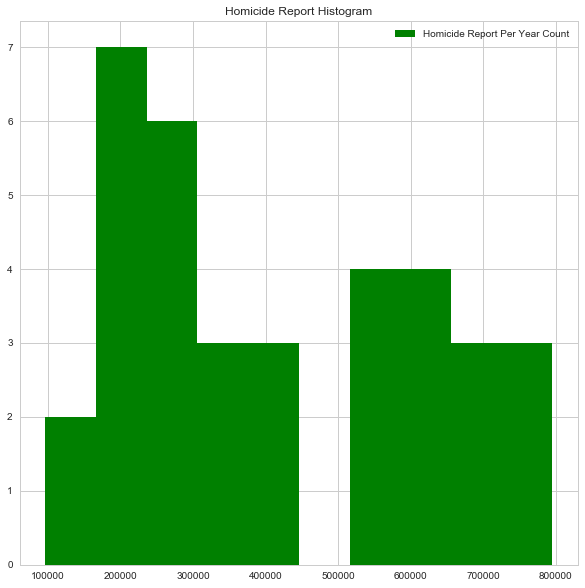

In [237]:
plt.rcParams['font.size'] = 9.0
plt.hist(YearWiseIncident.Incident, 10, histtype='stepfilled',
         align='mid', color='g', label='Homicide Report Per Year Count')
plt.legend()
plt.title('Homicide Report Histogram')
plt.show()

Getting Perpetrator Race Data

In [238]:
RaceHomicideDF = Homicidedataframe[['Year','Perpetrator Race','Incident']]
RaceHomicideDF = RaceHomicideDF[RaceHomicideDF['Perpetrator Race']!='Unknown']
RaceHomicideDF = RaceHomicideDF.groupby(['Year', 'Perpetrator Race'],as_index=False).sum()
#RaceHomicideDF

Pivot Table

In [239]:
RaceHomicideDF=RaceHomicideDF.pivot(index='Year', columns='Perpetrator Race', values='Incident')
RaceHomicideDF=RaceHomicideDF.fillna(0)
#RaceHomicideDF

Draw Scatter Plot for Perpetrator Race

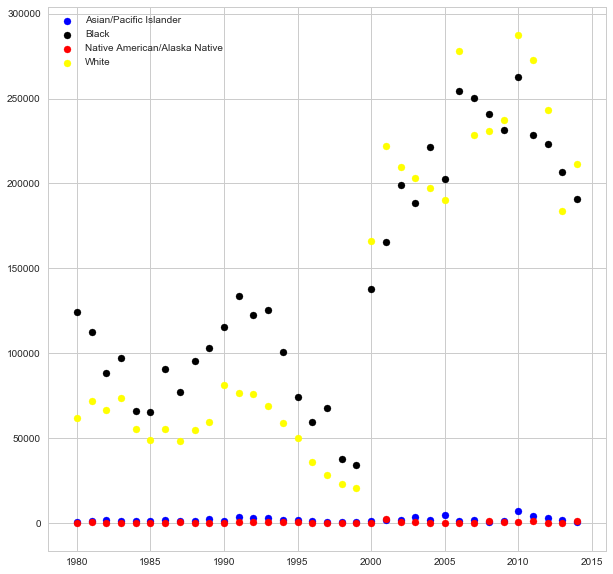

In [240]:
rcParams['figure.figsize'] = 10, 10
Asian = plt.scatter(RaceHomicideDF.index, RaceHomicideDF['Asian/Pacific Islander'],color='Blue')
Black = plt.scatter(RaceHomicideDF.index, RaceHomicideDF['Black'],color='Black')
NativeAmerican = plt.scatter(RaceHomicideDF.index, RaceHomicideDF['Native American/Alaska Native'],color='Red')
White = plt.scatter(RaceHomicideDF.index, RaceHomicideDF['White'],color='Yellow')
plt.legend((Asian, Black, NativeAmerican, White),
           ('Asian/Pacific Islander', 'Black', 'Native American/Alaska Native', 'White'),
           loc='upper left',)
plt.show()

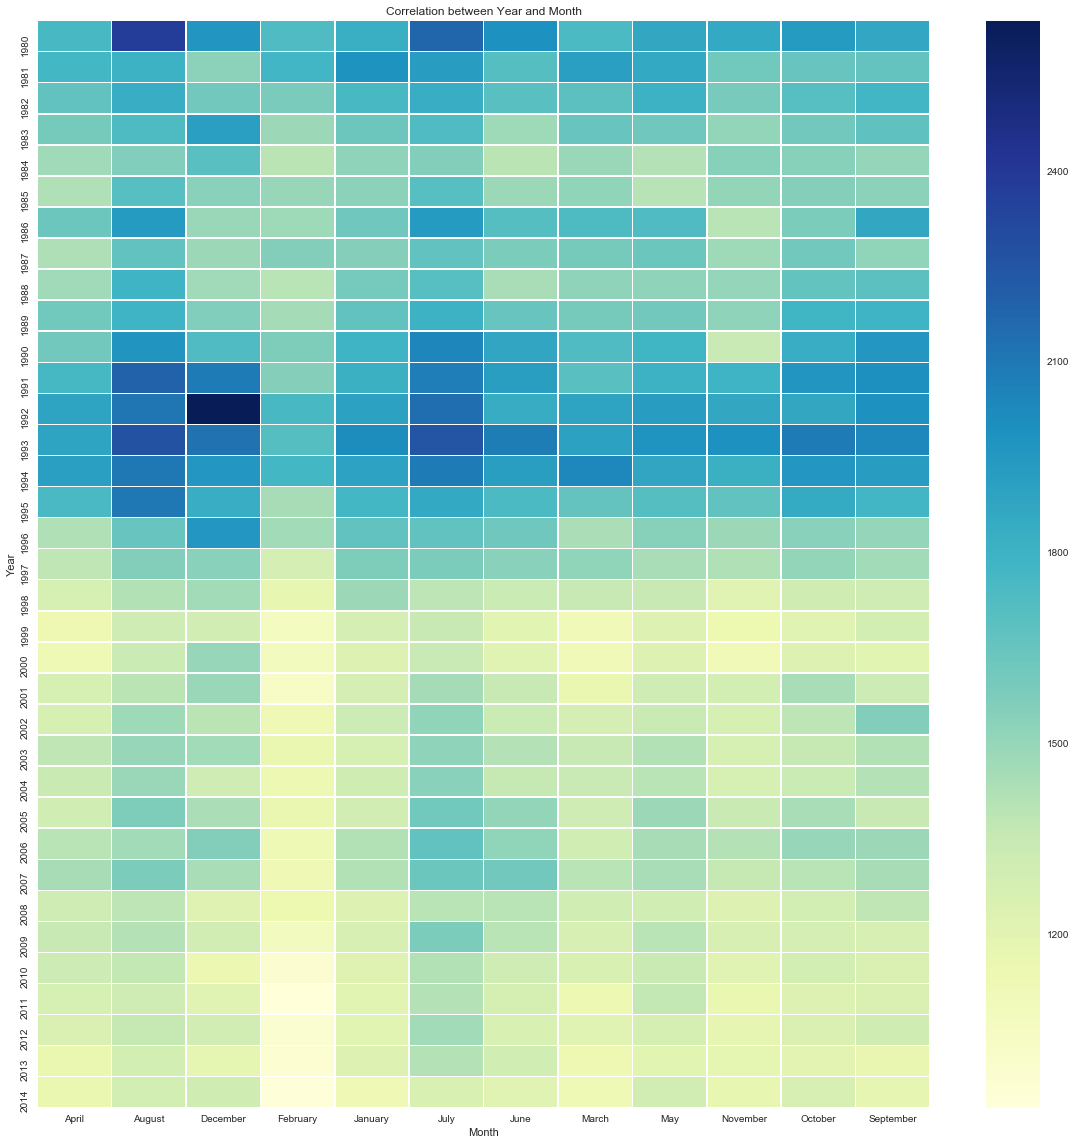

In [241]:
sns.set_style('whitegrid')
homicide_stats = pd.io.parsers.read_csv("HomicideReport.csv", low_memory=False)
year_month=homicide_stats.groupby(['Year','Month'], as_index= False).size().reset_index(name='count')
#year_month
hs2=pd.pivot_table(year_month,index='Year',columns='Month',values='count')
data=hs2
plt.figure(figsize=(20,20))
sns.heatmap(data,linewidths=.5,cmap="YlGnBu" ) 
plt.title('Correlation between Year and Month')
plt.show()

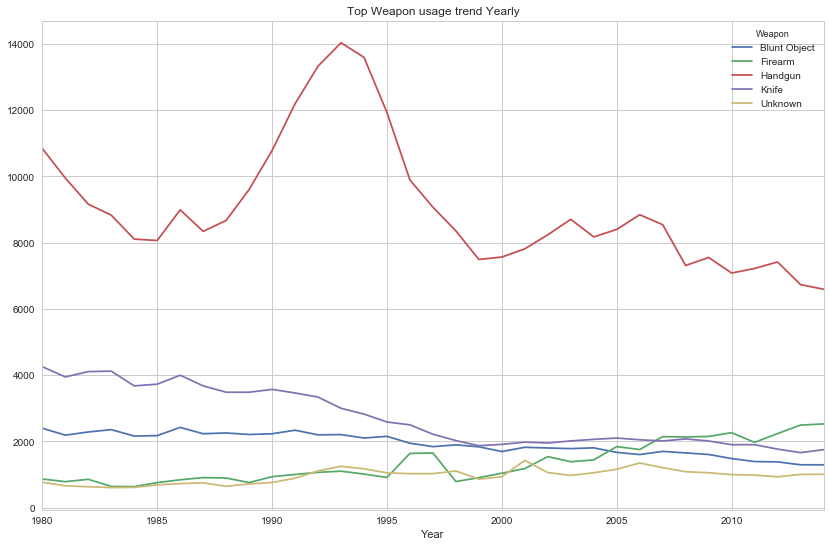

In [242]:
top_weapon = homicide_stats.groupby(['Weapon'], as_index= False).size().reset_index(name='count').sort_values('count',ascending=False).head()
weapon_stats=homicide_stats.groupby(['Year','Weapon'], as_index= False).size().reset_index(name='count')
weapon_stats=weapon_stats[weapon_stats.Weapon.isin(top_weapon.Weapon)]
#weapon_stats
ws=pd.pivot_table(weapon_stats, index='Year',columns='Weapon',values='count')
ws.plot(title = 'Top Weapon usage trend Yearly',kind='line',grid=True,figsize=(14,9))
plt.show()

In [ ]:
states_abbrev = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

state_abb_df = pd.DataFrame()
state_abb_df['Code'] = states_abbrev.keys()
state_abb_df['State'] = states_abbrev.values()

state_abb_df. head()

In [243]:
state_geo = json.load(file('us-states.json'))


state_report = homicide_stats.groupby(['State']).size().reset_index(name='Average_homicides_per_year')
state_report['Average_homicides_per_year'] = state_report['Average_homicides_per_year'].div(34) 
state_report = pd.merge(state_report, state_abb_df, on='State', how='inner')
#state_report.head()

In [244]:
state_geo = r'us-states.json'
state_report=state_report[['Code','Average_homicides_per_year']]
#state_report

map = folium.Map(location=[40, -99], zoom_start=4)
map.geo_json(geo_path=state_geo, data=state_report,
             columns=['Code', 'Average_homicides_per_year'],
             key_on='feature.id',
             threshold_scale = [0,300,600,1000,2000,3000], #[0,300,600,900,1200,1500,1800,2100,2400,2700,3000],
             fill_color='YlOrRd', fill_opacity=0.9, line_opacity=0.2,
             legend_name='Average Crime rate statewise')
map

In [245]:
xls_file=Homicidedataframe.groupby(['State','Year']).size().reset_index(name='Counts')
xls_file=xls_file.pivot(index='Year',columns='State',values='Counts')
#xls_file
#xls_file.plot()
#plt.show()

In [246]:
frame = DataFrame(xls_file)
frame.head()

State  Alabama  Alaska  Arizona  Arkansas  California  Colorado  Connecticut  \
Year                                                                           
1980     513.0    47.0    293.0     214.0      3590.0     198.0        158.0   
1981     453.0    69.0    237.0     209.0      2885.0     230.0        155.0   
1982     424.0    75.0    247.0     195.0      2976.0     193.0        164.0   
1983     372.0    74.0    225.0     199.0      2830.0     214.0        130.0   
1984     382.0    52.0    248.0     183.0      2888.0     192.0        116.0   

State  Delaware  District of Columbia  Florida   ...     South Dakota  \
Year                                             ...                    
1980       44.0                 180.0   1508.0   ...              5.0   
1981       41.0                 232.0   1586.0   ...             10.0   
1982       36.0                 204.0   1482.0   ...             16.0   
1983       27.0                 188.0   1262.0   ...             11.0   
1984       24.0                 175.0   1319.0   ...             10.0   

State  Tennessee   Texas  Utah  Vermont  Virginia  Washington  West Virginia  \
Year                                                                           
1980       497.0  2402.0  53.0      9.0     468.0       222.0          134.0   
1981       426.0  2293.0  54.0      9.0     474.0       208.0          122.0   
1982       418.0  1848.0  55.0      5.0     427.0       192.0          107.0   
1983       393.0  2352.0  56.0      6.0     405.0       226.0           97.0   
1984       343.0  2208.0  49.0     14.0     457.0       216.0           88.0   

State  Wisconsin  Wyoming  
Year                       
1980       145.0     34.0  
1981       148.0     26.0  
1982       148.0     34.0  
1983       135.0     30.0  
1984       124.0     20.0  

[5 rows x 51 columns]

In [248]:
GeorgiaPlot = frame[['Georgia']]
GeorgiaPlot.tail()

State  Georgia
Year          
2010     565.0
2011     557.0
2012     584.0
2013     567.0
2014     608.0

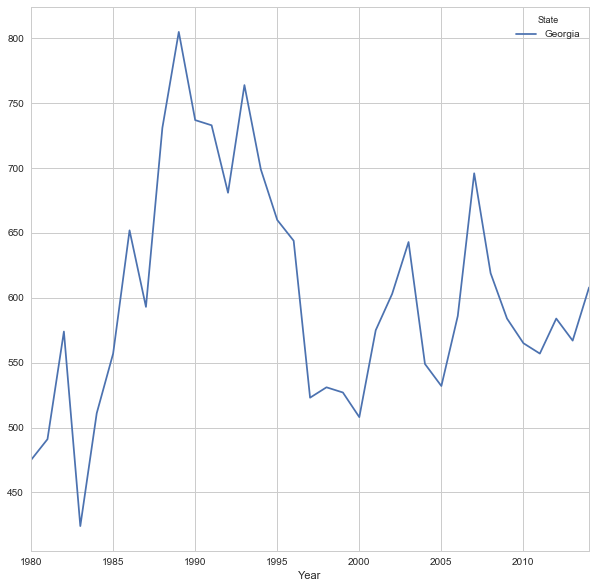

In [249]:
GeorgiaPlot.plot()
plt.show()

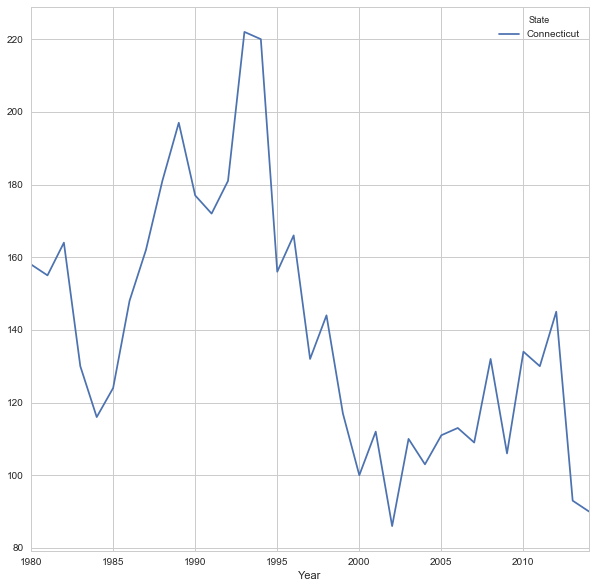

In [250]:
Connecticutset = frame[['Connecticut']]
Connecticutset.plot()
plt.show()

In [251]:
Perpetrator_sex= Homicidedataframe.groupby('Perpetrator Sex').size().sort_values(ascending=False).to_frame('Total').reset_index()
Perpetrator_sex

Perpetrator Sex   Total
0            Male  399541
1         Unknown  190365
2          Female   48548

In [252]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.charts import Bar, Histogram, Line, output_file, show
from bokeh.charts.attributes import cat, color
pd.options.display.max_columns = 20
output_notebook()

Per_sexes = Bar(Perpetrator_sex, 
                values='Total', 
                label=cat(columns='Perpetrator Sex', sort=False), 
                color=color(columns='Perpetrator Sex', palette=['Red'], sort=False), 
                legend=False,
                title='Perpetrator Sexes')


show(Per_sexes)

Loading BokehJS ...

In [253]:
# Top Cities affeted by the homicide data frame

top_cities = Homicidedataframe.groupby('City').size().sort_values(ascending=False).to_frame('Total').reset_index().head(15)
top_cities.head()

City  Total
0  Los Angeles  44511
1     New York  38431
2         Cook  22383
3        Wayne  19904
4       Harris  16331

In [254]:
# Bar Chart 

cities = Bar(top_cities,
             values='Total',
             label=cat(columns='City', sort=False),
             color=color(columns='City', palette=['Red'], sort=False),
             legend=False,
             title="Cities")

show(cities)

In [255]:
# Dataframe for all the Races (Victim Race) and it's Total

df = pd.DataFrame()
df
df['Black'] = Homicidedataframe[(Homicidedataframe['Victim Race'] == 'Black')]['Year'].value_counts()
df['White'] = Homicidedataframe[(Homicidedataframe['Victim Race'] == 'White')]['Year'].value_counts()
df['Native'] = Homicidedataframe[(Homicidedataframe['Victim Race'] == 'Native American/Alaska Native')]['Year'].value_counts()
df['Asian'] = Homicidedataframe[(Homicidedataframe['Victim Race'] == 'Asian/Pacific Islander')]['Year'].value_counts()
df['Total'] = Homicidedataframe[Homicidedataframe['Victim Race'] != np.nan]['Year'].value_counts()

df = df.reset_index().rename(columns={'index': 'Year'})
df.head()

Year  Black  White  Native  Asian  Total
0  1993  12269  11260     148    449  24335
1  1994  11723  10825     139    393  23246
2  1992  11705  11338     160    410  23793
3  1991  11190  10715     144    420  22657
4  1990  10344  10298     139    221  21246

In [256]:
df = pd.DataFrame()
df
df['Black'] = Homicidedataframe[(Homicidedataframe['Victim Race'] == 'Black')]['Year'].value_counts()
df['White'] = Homicidedataframe[(Homicidedataframe['Victim Race'] == 'White')]['Year'].value_counts()
df['Native'] = Homicidedataframe[(Homicidedataframe['Victim Race'] == 'Native American/Alaska Native')]['Year'].value_counts()
df['Asian'] = Homicidedataframe[(Homicidedataframe['Victim Race'] == 'Asian/Pacific Islander')]['Year'].value_counts()

df = df.reset_index().rename(columns={'index': 'Year'})
df.head()

Year  Black  White  Native  Asian
0  1993  12269  11260     148    449
1  1994  11723  10825     139    393
2  1992  11705  11338     160    410
3  1991  11190  10715     144    420
4  1990  10344  10298     139    221

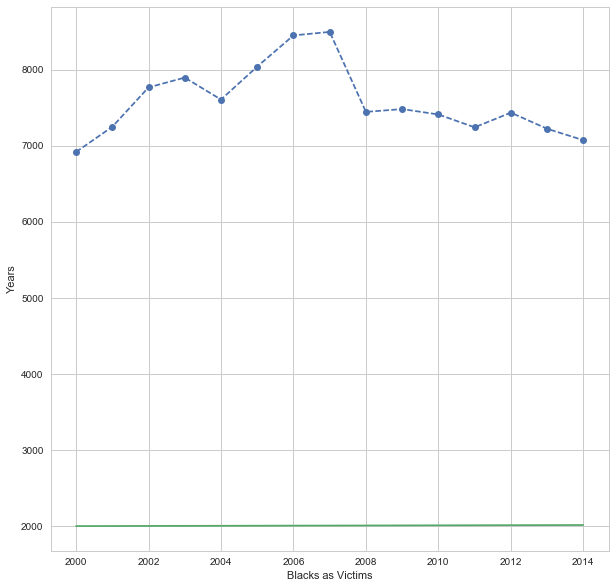

In [257]:
x = np.array([6921,7252,7770,7899,7610,8044,8454,8500,7448,7485,7414,7245,7438,7226,7076])
y = np.array([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014])
plt.plot(range(2000,2015), x, 'o--')
plt.xlabel('Blacks as Victims')
plt.ylabel('Years')
plt.plot(range(2000,2015),y)
plt.show()

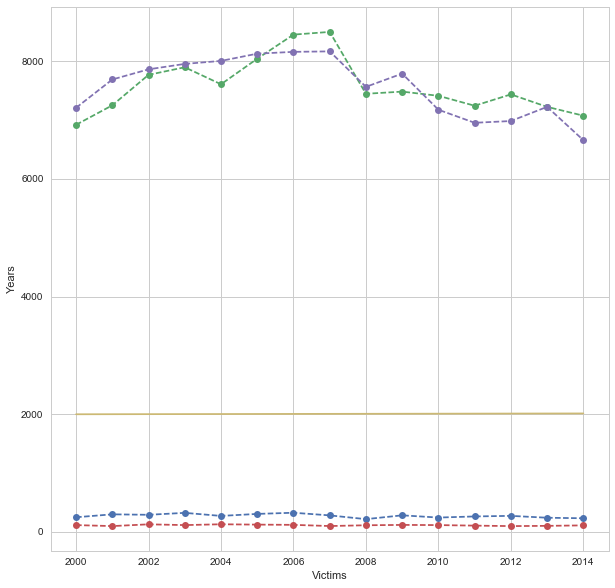

In [258]:
x = np.array([6921,7252,7770,7899,7610,8044,8454,8500,7448,7485,7414,7245,7438,7226,7076])
x1= np.array([249,299,291,324,272,306,326,281,217,282,244,263,273,241,232])
x2= np.array([116,99,129,116,130,124,120,100,113,119,116,107,99,103,111])
x3= np.array([7210,7691,7864,7956,8007,8130,8161,8169,7566,7791,7177,6955,6985,7226,6660])
y = np.array([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014])
plt.plot(range(2000,2015), x1, 'o--')
plt.plot(range(2000,2015), x, 'o--')
plt.plot(range(2000,2015), x2, 'o--')
plt.plot(range(2000,2015), x3, 'o--')
#legend(x='Blacks',x1='Asian',x2='Native',x3='White','top_right')
plt.legend(loc='upper right')
plt.xlabel('Victims')
plt.ylabel('Years')
plt.plot(range(2000,2015),y)
plt.show()